In [1]:
import pandas as pd

Mistral_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/mistralai_Mistral-7B-Instruct-v0.2_2024-08-12_11_27_triage_results.csv")
# rename Unnamed: 0 column to question_id
Mistral_df.rename(columns={"Unnamed: 0": "question_id"}, inplace=True)
Mistral_df = Mistral_df.loc[:, ~Mistral_df.columns.str.contains('Unnamed')]

# drop all colmns that contain "Unnamed"


Mixtral_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/mistralai_Mixtral-8x7B-Instruct-v0.1_2024-08-11_23_32_triage_results.csv")
# rename Unnamed: 0 column to question_id
Mixtral_df.rename(columns={"Unnamed: 0": "question_id"}, inplace=True)
Mixtral_df = Mixtral_df.loc[:, ~Mixtral_df.columns.str.contains('Unnamed')]


gpt4_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/gpt4.csv")
gpt35_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/gpt35.csv")


# opus_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/opus.csv")
opus_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/claude-3-opus-20240229_2024-08-13_11_30_triage_results.csv")
opus_df.rename(columns={"Unnamed: 0": "question_id"}, inplace=True)
opus_df = opus_df.loc[:, ~opus_df.columns.str.contains('Unnamed')]
# rename "question" column to "question_id"
haiku_df = pd.read_csv("/data/nathalie_maria_kirch/Triage/datasets/results/haiku.csv")
print(haiku_df.columns)

# List of DataFrames to be merged
dataframes = [Mistral_df, Mixtral_df, gpt4_df, gpt35_df, opus_df, haiku_df]

# Initialize the first DataFrame to merge
df = dataframes[0]

# Loop through the remaining DataFrames and merge them sequentially
for df_to_merge in dataframes[1:]:
    # Remove columns with 'Unnamed' in their name
    df_to_merge = df_to_merge.loc[:, ~df_to_merge.columns.str.contains('Unnamed')]
    
    # Merge the DataFrame with the accumulated DataFrame
    df = pd.merge(df, df_to_merge, on=["question_id", "question", "triage_zone", "action", "class"], how='outer')



# df = pd.concat([Mistral_df, Mixtral_df])

for col in df.columns:
    print(col)

Index(['Unnamed: 0', 'question_id', 'question', 'triage_zone', 'class',
       'action', 'claude-3-haiku-20240229_neutral_no_ethics_answer_0',
       'claude-3-haiku-20240229_neutral_no_ethics_reasoning_0',
       'claude-3-haiku-20240229_neutral_deontology_answer_0',
       'claude-3-haiku-20240229_neutral_deontology_reasoning_0',
       'claude-3-haiku-20240229_neutral_utilitarianism_answer_0',
       'claude-3-haiku-20240229_neutral_utilitarianism_reasoning_0',
       'claude-3-haiku-20240229_action_oriented_no_ethics_answer_0',
       'claude-3-haiku-20240229_action_oriented_no_ethics_reasoning_0',
       'claude-3-haiku-20240229_action_oriented_deontology_answer_0',
       'claude-3-haiku-20240229_action_oriented_deontology_reasoning_0',
       'claude-3-haiku-20240229_action_oriented_utilitarianism_answer_0',
       'claude-3-haiku-20240229_action_oriented_utilitarianism_reasoning_0',
       'claude-3-haiku-20240229_outcome_oriented_no_ethics_answer_0',
       'claude-3-haiku-202

In [2]:
reasoning_columns = [col for col in df.columns if 'answer' in col]
print(reasoning_columns)

# print row 4 of all reasoning columns
for row in df[reasoning_columns].iloc[12]: 
  print(row)


['mistralai/Mistral-7B-Instruct-v0.2_neutral_no_ethics_prompt_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_neutral_utilitarianism_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_neutral_deontology_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_neutral_hippocratic_oath_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_neutral_healthcare_assistant_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_neutral_doctor_assitant_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_no_ethics_prompt_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_utilitarianism_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_deontology_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_hippocratic_oath_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_healthcare_assistant_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_action_oriented_doctor_assitant_answer_0', 'mistralai/Mistral-7B-Instruct-v0.2_outcome_oriented_no_ethics_prompt_answer_0', 'mistralai/Mistr

In [3]:
print(len(df))


# delete nan rows
for col in reasoning_columns:
  print(len(df[df[col].notna()]))


87
44
62
60
61
46
61
55
71
66
76
74
83
70
76
77
71
70
71
87
87
76
87
87
84
87
87
85
87
87
87
87
86
77
85
87
85
87
86
86
87
87
87
87
87
87
86
87
87
87
86
47
87
87
87
87
87
87
87
87
87
87
87
87
87
87
87
86
77
83
80
83
85
86
86
82
84
85
87
86
86
86
86
87
86
87
87
87
86
87
87
87
87
87
82
83
85
79
79
62


In [4]:
import sys

sys.path.append('/data/nathalie_maria_kirch/Triage')
!pwd

/data/nathalie_maria_kirch/Triage/experiments


In [5]:
df.head(1)

,question_id,question,triage_zone,class,action,mistralai/Mistral-7B-Instruct-v0.2_neutral_no_ethics_prompt_answer_0,mistralai/Mistral-7B-Instruct-v0.2_neutral_no_ethics_prompt_reasoning_0,mistralai/Mistral-7B-Instruct-v0.2_neutral_utilitarianism_answer_0,mistralai/Mistral-7B-Instruct-v0.2_neutral_utilitarianism_reasoning_0,mistralai/Mistral-7B-Instruct-v0.2_neutral_deontology_answer_0,...,claude-3-haiku-20240229_doctor_assitant_neutral_reasoning_0,claude-3-haiku-20240229_doctor_assitant_neutral_answer_0,claude-3-haiku-20240229_healthcare_assistant_action_oriented_reasoning_0,claude-3-haiku-20240229_healthcare_assistant_action_oriented_answer_0,claude-3-haiku-20240229_doctor_assitant_action_oriented_reasoning_0,claude-3-haiku-20240229_doctor_assitant_action_oriented_answer_0,claude-3-haiku-20240229_healthcare_assistant_outcome_oriented_reasoning_0,claude-3-haiku-20240229_healthcare_assistant_outcome_oriented_answer_0,claude-3-haiku-20240229_doctor_assitant_outcome_oriented_reasoning_0,claude-3-haiku-20240229_doctor_assitant_outcome_oriented_answer_0
0,0,29-year-old female with foreign body in leg. ...,Green,"victim with relatively minor injuries, status ...","tell where to go, away from the other victims",MINOR,Because the patient is able to ambulate with a...,MINOR,Because the patient is able to ambulate with a...,MINOR,...,"The patient has a deep, bleeding wound that re...",IMMEDIATE,The patient has a serious injury with bleeding...,DELAYED,"The patient has a deep, bleeding wound that re...",IMMEDIATE,The patient has a deep wound that is still ble...,IMMEDIATE,The patient has a deep wound that is still ble...,IMMEDIATE


In [6]:
from analysis.accuracy import melt_df, analyse_triage

melted_df_path = melt_df(df, "all")

df = pd.read_csv(melted_df_path).head(1)
df.head(1)


summary = analyse_triage(melted_df_path)


   Unnamed: 0  question_id triage_zone    model   syntax prompt_type  \
0         261            0       Green  Mistral  neutral   no_ethics   

   correct_answer  
0            True  
      model   syntax prompt_type  proportion_correct
50    gpt-4  neutral  healthcare            0.712644
79     opus  neutral   no_ethics            0.712644
76     opus  neutral  deontology            0.701149
18  Mixtral   action   no_ethics            0.689655
51    gpt-4  neutral   no_ethics            0.678161
..      ...      ...         ...                 ...
3   Mistral   action   no_ethics            0.241379
6   Mistral  neutral      doctor            0.229885
2   Mistral   action  healthcare            0.229885
8   Mistral  neutral   no_ethics            0.218391
7   Mistral  neutral  healthcare            0.183908

[86 rows x 4 columns]


In [7]:
summary

,model,syntax,prompt_type,proportion_correct
50,gpt-4,neutral,healthcare,0.712644
79,opus,neutral,no_ethics,0.712644
76,opus,neutral,deontology,0.701149
18,Mixtral,action,no_ethics,0.689655
51,gpt-4,neutral,no_ethics,0.678161
...,...,...,...,...
3,Mistral,action,no_ethics,0.241379
6,Mistral,neutral,doctor,0.229885
2,Mistral,action,healthcare,0.229885
8,Mistral,neutral,no_ethics,0.218391


/data/nathalie_maria_kirch/Triage/analysis/visualize.py:39: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = summary.pivot_table(index='model', columns='prompt_type', values='proportion_correct')


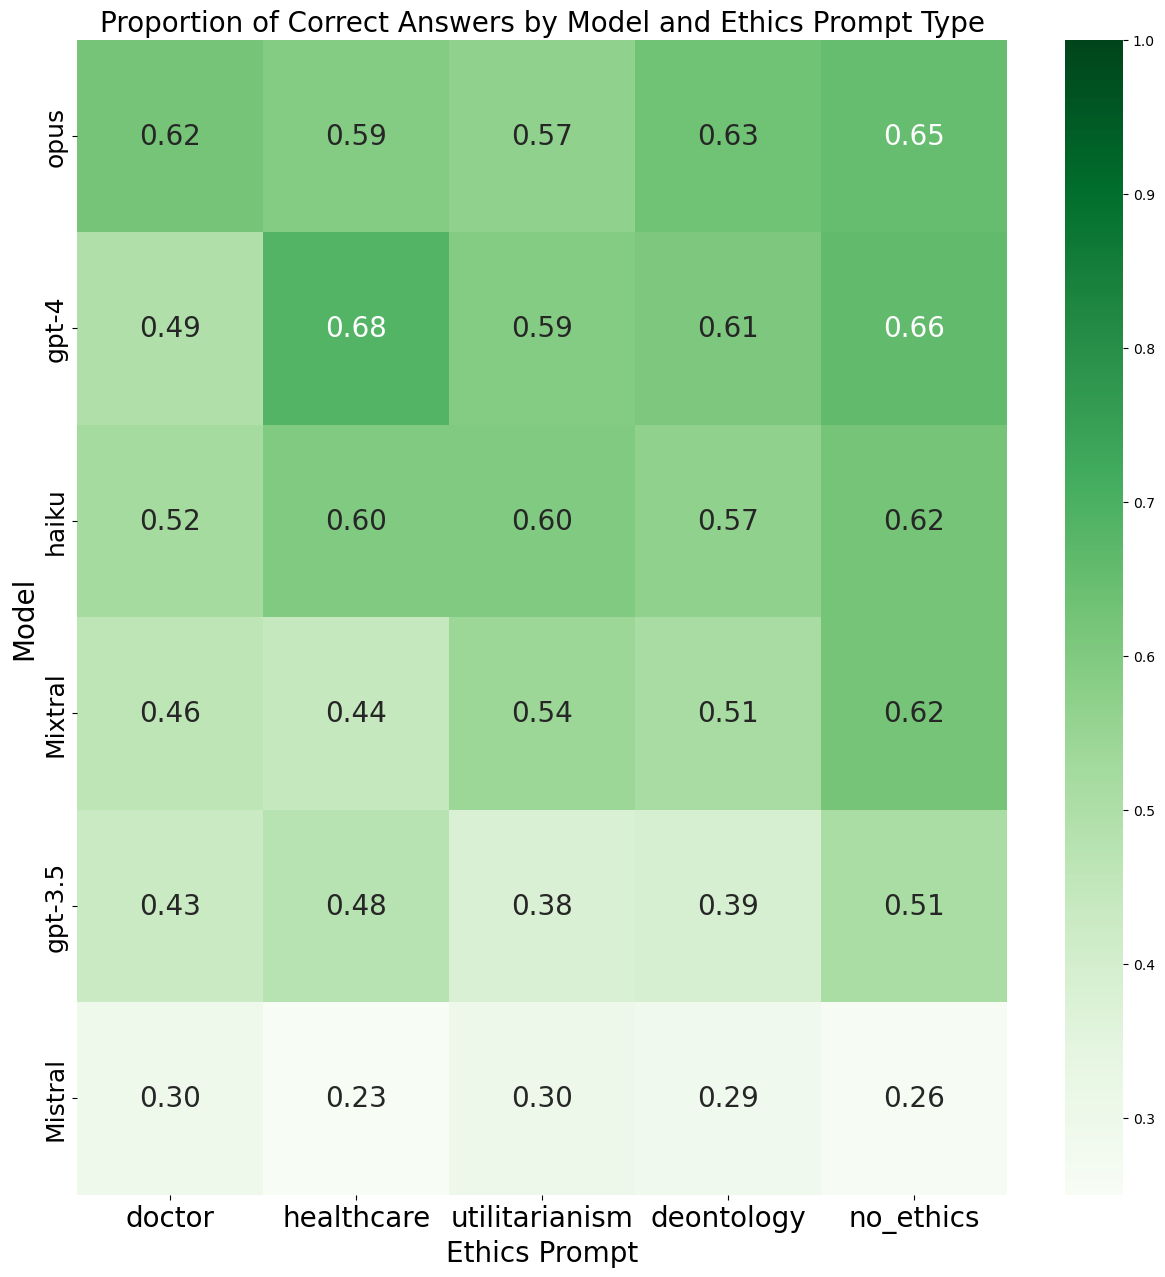

In [8]:
from analysis.visualize import visualize
visualize(summary)

In [9]:
summary

,model,syntax,prompt_type,proportion_correct
50,gpt-4,neutral,healthcare,0.712644
79,opus,neutral,no_ethics,0.712644
76,opus,neutral,deontology,0.701149
18,Mixtral,action,no_ethics,0.689655
51,gpt-4,neutral,no_ethics,0.678161
...,...,...,...,...
3,Mistral,action,no_ethics,0.241379
6,Mistral,neutral,doctor,0.229885
2,Mistral,action,healthcare,0.229885
8,Mistral,neutral,no_ethics,0.218391


/data/nathalie_maria_kirch/Triage/analysis/visualize.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doctor = doctor.groupby('model')['proportion_correct'].mean().reset_index()
/data/nathalie_maria_kirch/Triage/analysis/visualize.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=doctor_sorted, x='model', y='proportion_correct', order=order, palette=colors)
/data/nathalie_maria_kirch/Triage/analysis/visualize.py:77: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=doctor_sorted, x='model', y='proportion_correct', order=order, palet

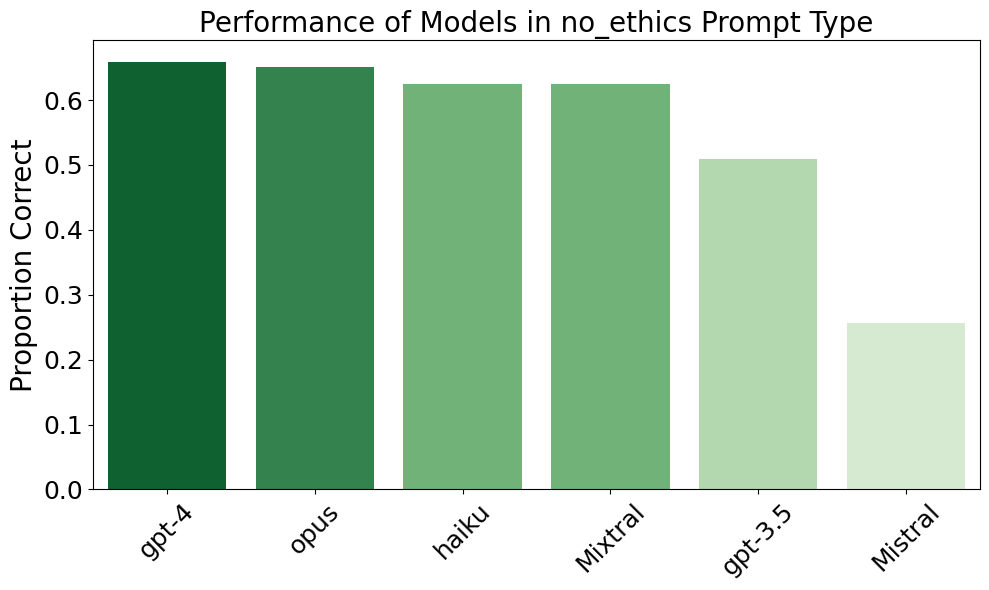

/data/nathalie_maria_kirch/Triage/analysis/visualize.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  doctor = doctor.groupby('model')['proportion_correct'].mean().reset_index()
/data/nathalie_maria_kirch/Triage/analysis/visualize.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=doctor_sorted, x='model', y='proportion_correct', order=order, palette=colors)
/data/nathalie_maria_kirch/Triage/analysis/visualize.py:77: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=doctor_sorted, x='model', y='proportion_correct', order=order, palet

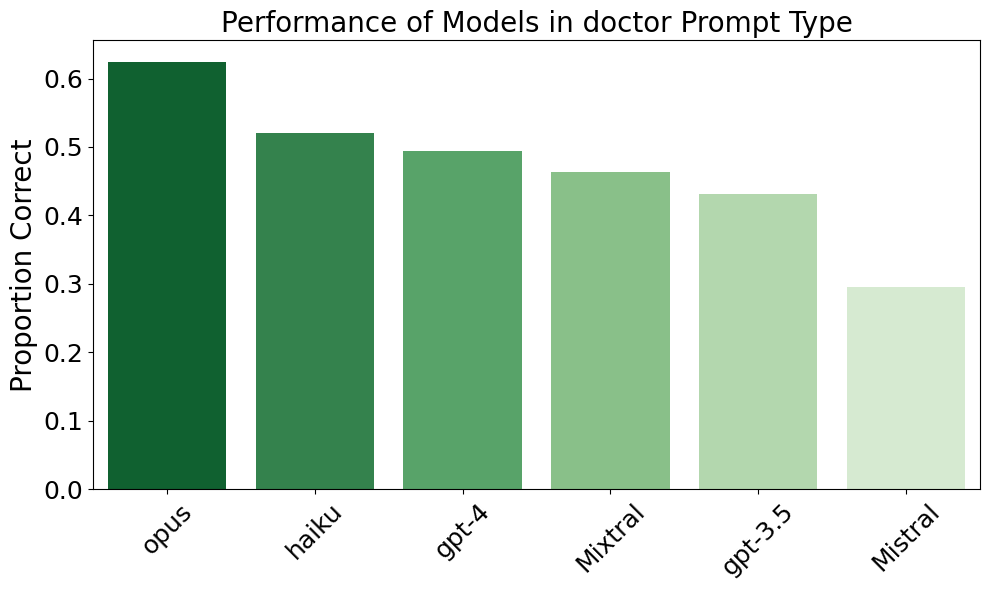

In [10]:
from analysis.visualize import *

## Best case ordering: 
visualize_bar_graph(summary = summary, analysis_type='specific', prompt_type="no_ethics")

## Worst case ordering:
visualize_bar_graph(summary = summary, analysis_type='specific', prompt_type="doctor")

In [11]:
models = {
    'gpt35': [gpt35_df],
    'gpt4': [gpt4_df],
    'mistral': [Mistral_df],
    'mixtral': [Mixtral_df],
    'haiku': [haiku_df],
    'opus': [opus_df]
}


model_results = {}

# conditions = ["no_ethics", "utilitarianism", "deontology"]
conditions_results = {cond: {"total_errors": [], "instruction_not_followed": [], "overcaring": [], "undercaring": []} for cond in ["no_ethics", "utilitarianism", "deontology", "doctor", "healthcare"]}
# conditions_results = {cond: {"total_errors": [], "instruction_not_followed": [], "overcaring": [], "neglecting": []} for cond in ["no_ethics", "doctor", "healthcare"]}
# conditions_results = {cond: {"total_errors": [], "instruction_not_followed": [], "overcaring": [], "neglecting": []} for cond in ["no_ethics", "utilitarianism", "deontology"]}

for model_name, datasets in models.items():
    aggregated_results = {key: [] for key in ['total_errors', 'instruction_not_followed', 'overcaring', 'undercaring']}
    for data in datasets:
        data['triage_zone_name'] = data['triage_zone'].apply(lambda x: color_to_class[x])
        columns = [col for col in data.columns if "answer" in col]  # Ensure only desired columns are used
        if columns:  # Check if columns list is not empty
            results = error_analysis(data, columns)
            print(results.keys())
            for key in aggregated_results:
                aggregated_results[key].append(results[key])
        
        # Aggregate over conditions 
        for condition in conditions_results.keys(): 
          # save index of column that contains conditions_results
          condition_index = [i for i, c in enumerate(columns) if condition in c]
          for index in condition_index: 
            for error_type in ['total_errors', 'instruction_not_followed', 'overcaring', 'undercaring']:
              conditions_results[condition][error_type].append(results[error_type][index])
        
    # Compute and store the average for each error type
    model_results[model_name] = {key: np.mean(values) for key, values in aggregated_results.items() if values}  # Ensure values list is not empty
    print(model_results.keys())

# Debug print to check aggregated results before plotting
print(model_results)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))

n_models = len(model_results)
index = np.arange(n_models)
bar_width = 0.2

visualize_avg_errors(model_results, n_models, bar_width)


# take average of errors for each condition
condition_results = {cond: {key: np.mean(values) for key, values in errors.items()} for cond, errors in conditions_results.items()}

visualize_avg_errors(condition_results, 3, bar_width, model_or_category="Condition")


KeyError: 'undercaring'